In [1]:
import tensorflow as tf

print("TensorFlow version:", tf.__version__)

2023-03-14 11:06:56.898093: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


TensorFlow version: 2.11.0


In [2]:
"""
Laad de MNIST dataset.
Normaliseer de data van 0-255 naar 0-1.
Op deze manier worden de integers ook omgezet naar floats.
"""

dim = 255.0
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / dim, x_test / dim


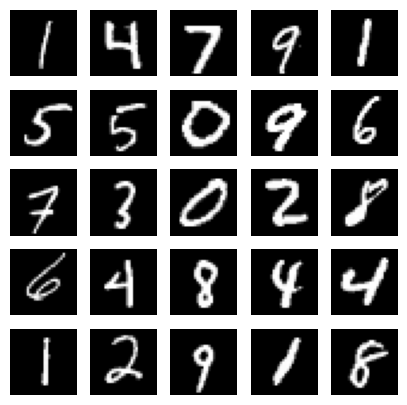

In [110]:
# show the first 10 images in the training set
import matplotlib.pyplot as plt
import numpy as np

indexes = np.random.randint(0, x_train.shape[0], size=25)
images = x_train[indexes]
labels = y_train[indexes]

plt.figure(figsize=(5,5))
for i in range(len(indexes)):
    plt.subplot(5, 5, i + 1)
    image = images[i]
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    
plt.show()
plt.savefig("mnist-samples.png")
plt.close('all')

In [158]:
"""
Maak een sequentieel model.

Voeg een Flatten layer toe die een 2D input foto (28x28 pixels) omzet naar een 1D array.
De input die we binnenkrijgen, stelt een veld van pixels voor. Dit is een 2d array.
Aangezien we een neuraal netwerk hebben en een neuraal netwerk altijd werkt met een 1d array als input, moeten we de 2d array omzetten naar een 1d array.
De flatten layer gaat dit voor ons doen.

Voeg een Dense layer toe met 128 neuronen en een ReLU activatie functie.
Een dense layer gaat voor de verbintenis zorgen tussen de input en de output. Wanneer we een dense layer toevoegen, gaat elke neuron van de vorige layer, verbonden worden met elke neuron in de dense layer. Dit zorgt ervoor dat we een volledig verbonden neuraal netwerk hebben.
De activatiefunctie gaat de input-waarde vergelijken met een threshold waarde:
    - Als de input-waarde hoger is dan de threshold, dan zal de neuron geactiveerd worden (er wordt geen output naar de volgende layer gestuurd vanuit deze neuron).
    - Als de input-waarde lager is dan de threshold, dan zal de neuron niet geactiveerd worden.
Met de ReLu activatiefunctie, zal de neuron geactiveerd worden als de input-waarde hoger is dan 0. Wanneer deze negatief is, zal de neuron niet geactiveerd worden.
Dit wil zeggen dat de ReLu activatiefunctie een threshold heeft van 0.

Voeg een Dropout layer toe die willekeurig 20% van de input elementen op 0 zet tijdens de training.
Met een dropout layer gaan we proberen overfitting tegen te gaan, waarbij overfitting veroorzaakt wordt als het model te veel leert van de training data.
Een voorbeeld: stel we hebben 1000 neuronen in ons neuraal netwerk en een dropout van 20%, dan gaan willekeurig 200 neuronen in iedere iteratie op 0 staan.
Hoe lost dit overfitting op? Wanneer dit niet gebeurd, dan zal het model zich aanpassen aan de training data en zal het model niet goed kunnen generaliseren.
Door een dropout layer toe te voegen, zorgen we ervoor dat in iedere iteratie het neuraal netwerk een andere combinatie van neuronen gebruikt. Hierdoor gaan we het model dwingen om te generaliseren.

Voeg een Dense layer toe met 10 neuronen (1 voor elke class)
We doen aan clasiificatie, en kunnen onze data onderverdelen in 10 classes. Dit zorgt ervoor dat we in de output ook 10 neuronen nodig hebben, 1 voor elke class.

Kortom, dit model classificeert afbeeldingen van 28x28 pixels naar 10 classes.
"""

aooc = 10 # Amount of output classes
hidden_layer_size = 128
dropout = 0.40

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  
  tf.keras.layers.Dense(hidden_layer_size, activation='relu'),
  tf.keras.layers.Dropout(dropout),

  tf.keras.layers.Dense(hidden_layer_size, activation='relu'),
  tf.keras.layers.Dropout(dropout),

  tf.keras.layers.Dense(aooc)
])

In [184]:
"""
Het model geeft een array terug met 10 logits.
"""
predictions = model(x_train[:1]).numpy()

In [185]:
"""
De softmax functie convergeert een array van "logits" naar een array van waardes die optellen naar 1.
Deze waardes kunnen dan gezien worden als percentages, waarbij het hoogste percentage aangeeft welke class het meest waarschijnlijk is.
"""
tf.nn.softmax(predictions).numpy()

array([[4.2854098e-33, 1.7037983e-19, 3.1766924e-22, 1.5026865e-06,
        1.3835890e-26, 9.9999845e-01, 9.1390594e-22, 8.9652937e-24,
        1.1262799e-18, 3.1067269e-12]], dtype=float32)

In [186]:
"""
De loss functie meet hoe goed het model voorspelt welke afbeelding bij welke class hoort.
"""
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [191]:
"""
Aangezien een ongetraind model random voorspelt, zou elke class een gelijke probability hebben.
Deze intial loss kan berekend worden door het volgende te doen:
"""
initial_loss = tf.math.log(1/aooc)
print(f"De initiele loss is: {initial_loss}")

De initiele loss is: -2.3025851249694824


In [188]:
"""
Het model word hier gecompileerd en geconfigureerd zodat deze getraind kan worden.
Er wordt gekozen voor een Adam optimizer.
De metrics parameter geeft aan welke evaluatie criteria gebruikt worden om te bepalen hoe goed het model is.
"""
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

In [ ]:
"""
Het model word hier getraind.
De epochs parameter geeft aan hoe vaak het model volledig door de dataset heen gaat. Elke iteratie noemen we dus een epoch.
Hoe hoger deze waarde, hoe meer het model leert. Echter kan dit ook leiden tot overfitting. Hier moet je dus mee uitkijken.
"""


history = model.fit(x_train, y_train, epochs=25, validation_data = (x_test, y_test))

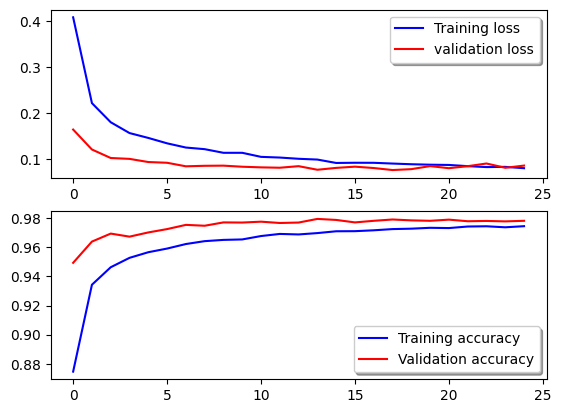

In [192]:
"""
We plotten de learning curve, waarbij we bekijken hoe goed ons model de data 'fit'.
"""
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

plt.show()

In [165]:
# Save the model under the name model_{current time-current date}
import datetime

now = datetime.datetime.now()

model.save(f"model_{now.strftime('%H-%M-%S_%d-%m-%Y')}.h5")


In [189]:
"""
We testen hier het model op de test dataset.
"""
model.evaluate(x_test,  y_test, verbose=2)

313/313 - 1s - loss: 0.0857 - accuracy: 0.9783 - 740ms/epoch - 2ms/step


[0.08569369465112686, 0.9782999753952026]

In [103]:
""" Enkel uit te voeren wanneer het model ingeladen werd! """

"""
Laad een model in.
"""
model = tf.keras.models.load_model('models/model_two/model_11-41-43_14-03-2023.h5')
model.evaluate(x_test,  y_test, verbose=2)


OSError: No file or directory found at models/model_two/model_11-41-43_14-03-2023.h5

1/1 [==============================] - 0s 22ms/step
The model predicted that the image contains the number 6


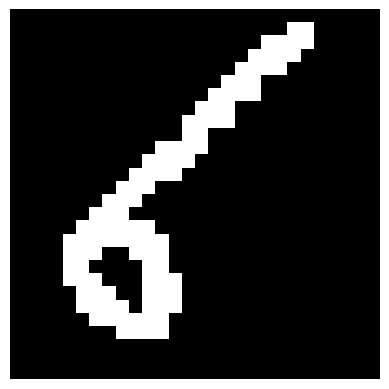

In [177]:
# Test the model on a random image
import numpy as np
from PIL import Image

image = Image.open('pictures/6_v3.png').convert('L')  # Load image and convert to grayscale
image = image.resize((28, 28))  # Resize image to 28x28 pixels
image_array = np.array(image)  # Convert image to numpy array
image_array = image_array / 255.0  # Normalize pixel values to be between 0 and 1
image_array = np.expand_dims(image_array, axis=0)  # Add an extra dimension for batch size

plt.imshow(image, cmap='gray')
plt.axis('off')

prediction = model.predict(image_array)
predicted_label = np.argmax(prediction)

print(f"The model predicted that the image contains the number {predicted_label}")

Na 5 iteraties zien we het volgende resultaat
> 313/313 - 1s - loss: 0.0718 - accuracy: 0.9767 - 577ms/epoch - 2ms/step

Dit wilt zeggen dat het model een accuracy van 97.67% heeft

Analyze and identify where the system makes assumptions that possibly could be wrong.

Het neurale netwerkt maakt assumpties gebasseerd op de data waarop deze getraind is. De accuratie van deze assumpties hangt af van de kwaliteit en hoeveelheid van trainingsdata.
In de bovenstaande code, kan het op verschillende plekken fout gaat:
    - Onvoldoende of gebiasde trainingsdata: wanneer er te weinig data is, of de data niet representatief is, wordt het model hier ook op getraind en gaat het aannemen dat dit de juiste data is.
    - Overfitting: wanneer het model te veel gaat leren, gaat het zich aanpassen aan de data en zal het heel moeilijk worden om nieuwe input te gaan voorspellen.
    - De opbouw van het neurale netwerk: wanneer verkeerde keuzes gemaakt worden, zoals bijvoorbeeld de activatiefunctie of de loss functie, kan dit het model gaan beinvloeden en uiteindelijk leiden tot een slechte voorspelling.
    - Opsplitsing trainingsdata en testdata: bij het trainen van een model, zullen we de data op moeten splitsen in een trainingsset en een testset. Dit is vaak een bepaald percentage van de totale dataset. 
      Als het nu toevallig is dat de trainingsset specifiek focust op een bepaalde class, dan kan het zijn dat het model zich hierop gaat aanpassen en niet goed kan generaliseren naar andere classes. 